In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import make_classification

In [32]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)

In [34]:
X

array([[ 1.77378257, -2.25670424],
       [ 0.98176521,  1.22333765],
       [ 1.44083687, -1.13502678],
       ...,
       [ 0.86355215,  0.59377752],
       [ 1.03124767, -1.22092794],
       [ 1.13335112, -1.2316559 ]])

In [36]:
y

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,

<Axes: xlabel='0', ylabel='1'>

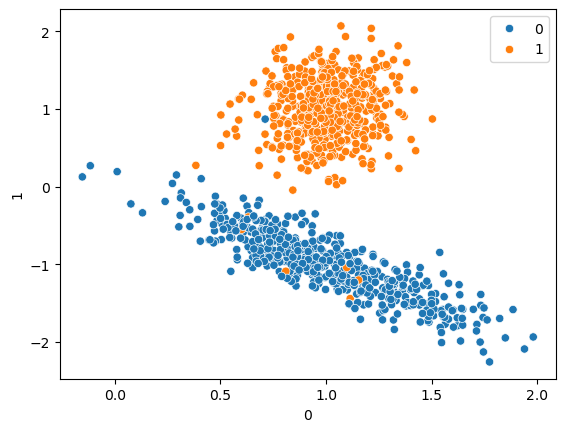

In [38]:
sns.scatterplot(x=pd.DataFrame(X).iloc[:, 0], y=pd.DataFrame(X).iloc[:, 1], hue=y)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

In [42]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [44]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [46]:
y_pred=svc.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_pred,y_test))

1.0


In [50]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        96

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



#SVC with non-linearly seperable data

In [58]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=2)

<Axes: xlabel='0', ylabel='1'>

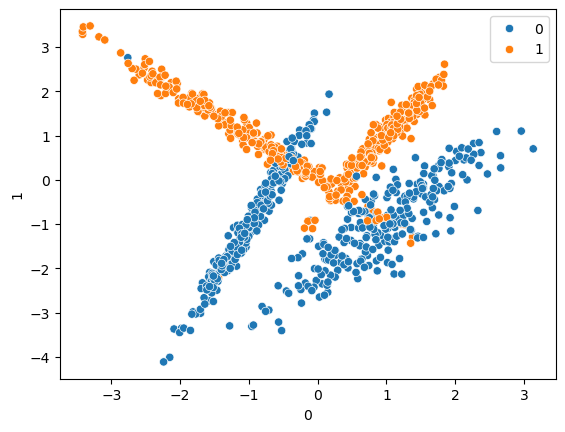

In [60]:
sns.scatterplot(x=pd.DataFrame(X).iloc[:, 0], y=pd.DataFrame(X).iloc[:, 1], hue=y)

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=38)

In [64]:
rbf=SVC(kernel='rbf')

In [66]:
rbf.fit(X_train,y_train)

SVC()

In [70]:
y_pred1=rbf.predict(X_test)

In [72]:
print(accuracy_score(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

0.9
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        86
           1       0.94      0.88      0.91       114

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



Hyper-parameter tuning

In [77]:
c_values=[0.1,1,10,100,1000]
gamma=[1,0.1,0.01,0.001,0.0001]
kernel=['sigmoid']

In [79]:
params=dict(C=c_values,gamma=gamma,kernel=kernel)

In [83]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(),param_grid=params,refit=True,cv=5,verbose=3)

In [85]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.838 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.844 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.756 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.831 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.838 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.887 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.850 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.838 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.881 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.844 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.887 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid']},
             verbose=3)

In [87]:
grid.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [89]:
grid.best_score_

0.8637499999999999

In [93]:
y_pred2=grid.predict(X_test)

In [97]:
print(accuracy_score(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

0.83
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        84
           1       0.89      0.81      0.85       116

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2,y_test)

array([[72, 12],
       [22, 94]])